En este ejercicio vamos a estudiar los ciclos que se producen en $\mathbb{Z}_m$, con $m$ un entero casi siempre primo, al elevar sucesivamente al cuadrado sus elementos. 

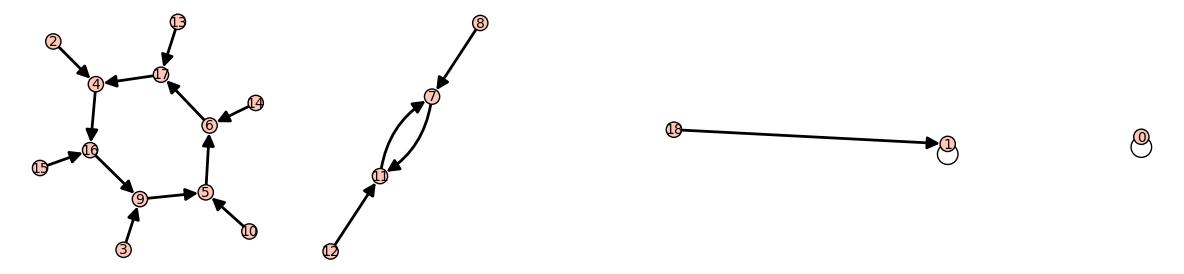

In [1]:
def f(n,m):
    return n^2%m

def diccionario(m):
    dicc = {}
    for int in srange(m):
        int2 = f(int,m)
        dicc[int]=[int2]
    return dicc

G1 = DiGraph(diccionario(19))
G1.graphplot().show(figsize=[12,12])

In [2]:
def orbita_c(f,n,m):
    L = []
    while not n in L:
        L.append(n)
        n = f(n,m)
    k = L.index(n)    
    return L[k:]

In [3]:
def ciclos(f,m):
    L = []
    for n in srange(m):
        L.append(orbita_c(f,n,m))
    return L

In [4]:
ciclos(f,19)

[[0],
 [1],
 [4, 16, 9, 5, 6, 17],
 [9, 5, 6, 17, 4, 16],
 [4, 16, 9, 5, 6, 17],
 [5, 6, 17, 4, 16, 9],
 [6, 17, 4, 16, 9, 5],
 [7, 11],
 [7, 11],
 [9, 5, 6, 17, 4, 16],
 [5, 6, 17, 4, 16, 9],
 [11, 7],
 [11, 7],
 [17, 4, 16, 9, 5, 6],
 [6, 17, 4, 16, 9, 5],
 [16, 9, 5, 6, 17, 4],
 [16, 9, 5, 6, 17, 4],
 [17, 4, 16, 9, 5, 6],
 [1]]

Vemos que los ciclos que aparecen son los mismos que el el grafo, y el único problema es que *ciclos* debería mostrar cada ciclo una única vez. Si no lo hace así tendríamos que comprobar a *ojo* qué ciclos son el mismo.  

In [5]:
def ciclosn(f,m):
    L = []
    A = set([])
    for n in srange(m):
        orb = orbita_c(f,n,m)
        if f(orb[-1],m)==orb[0] and orb[-1] not in A:
            L.append(orb)
            A = A | set(orb)
    return L

In [6]:
ciclosn(f,19)

[[0], [1], [4, 16, 9, 5, 6, 17], [7, 11]]

In [7]:
ciclosn(f,11)

[[0], [1], [4, 5, 3, 9]]

In [8]:
ciclosn(f,13)

[[0], [1], [3, 9]]

In [9]:
ciclosn(f,17)

[[0], [1]]

<p>&iquest;Qu&eacute; observamos con estos pocos ejemplos?&nbsp;</p>
<ol>
<li>Parece que para $m$ primo los &uacute;nicos puntos fijos son $0$ y $1$.</li>
<li>El comportamiento para $p=17$ es bastante diferente ya que los únicos puntos fijos que aparecen son $0$ y $1$.</li>
</ol>
<p>Usando estos pocos ejemplos, parece claro que debemos fijarnos el n&uacute;mero de puntos fijos, en el n&uacute;mero de ciclos y en sus longitudes.</p>

<h4>Puntos fijos:</h4>

In [10]:
def puntos_fijos(f,m):
    L = ciclosn(f,m)
    cont = 0
    for item in L:
        if len(item) == 1:
            cont += 1
    return cont

In [11]:
print [(m,puntos_fijos(f,m)) for m in prime_range(7,100)]

[(7, 2), (11, 2), (13, 2), (17, 2), (19, 2), (23, 2), (29, 2), (31, 2), (37, 2), (41, 2), (43, 2), (47, 2), (53, 2), (59, 2), (61, 2), (67, 2), (71, 2), (73, 2), (79, 2), (83, 2), (89, 2), (97, 2)]


In [12]:
[(m,puntos_fijos(f,m)) for m in prime_range(7,1000) if puntos_fijos(f,m) != 2]

[]

Parece que para todos los $m$ primos sólo hay dos puntos fijos, y podemos preguntarnos si es verdad que cuando $m$ es compuesto hay siempre algún otro punto fijo. 

In [13]:
print [m for m in srange(7,1000) if not is_prime(m) and puntos_fijos(f,m) == 2]

[8, 9, 16, 25, 27, 32, 49, 64, 81, 121, 125, 128, 169, 243, 256, 289, 343, 361, 512, 529, 625, 729, 841, 961]


<p>&iquest;Qu&eacute; tienen en com&uacute;n todos estos $m$?</p>

In [14]:
print [(m,factor(m)) for m in srange(7,1000) if not is_prime(m) and puntos_fijos(f,m) == 2]

[(8, 2^3), (9, 3^2), (16, 2^4), (25, 5^2), (27, 3^3), (32, 2^5), (49, 7^2), (64, 2^6), (81, 3^4), (121, 11^2), (125, 5^3), (128, 2^7), (169, 13^2), (243, 3^5), (256, 2^8), (289, 17^2), (343, 7^3), (361, 19^2), (512, 2^9), (529, 23^2), (625, 5^4), (729, 3^6), (841, 29^2), (961, 31^2)]


<p>Parece claro que todos son de la forma $p^k$ con $p$ primo. Nuestra nueva conjetura:</p>
<p>"El n&uacute;mero de puntos fijos es exactamente $2$, que son entonces $0$ y $1$, si y s&oacute;lo si $m$ es de la forma $p^k$ con $p$ primo."</p>



In [15]:
def comprobador_pf(N):
    L,L1 = [],[]
    for m in xsrange(2,N):
        if puntos_fijos(f,m) == 2 and len(list(factor(m))) != 1:
            L.append(m)
        if puntos_fijos(f,m) != 2 and len(list(factor(m))) == 1:
            L1.append(m)
    return L,L1

%time comprobador_pf(100)

CPU times: user 120 ms, sys: 28 ms, total: 148 ms
Wall time: 120 ms


([], [])

In [16]:
%time comprobador_pf(1000)

CPU times: user 34.7 s, sys: 64 ms, total: 34.8 s
Wall time: 34.7 s


([], [])

In [17]:
## %time comprobador_pf(10000)

Cálculo interrumpido. El tiempo de cálculo no parece lineal en $N$. ¿Se puede mejorar el código para que pueda efectuar esta comprobación en un tiempo razonable? 

<h4>Ciclos:</h4>

Hemos visto que para $m=17$ los únicos ciclos son los puntos fijos. ¿Qué tiene de particular el número $17$? En muchas ocasiones, cuando tratamos con números primos $p$, lo que importa, ya que $p$ no se factoriza,  es la factorización de $p-1$. En este caso, el $17$ es muy especial ya que $p-1=16=2^4$ es una potencia de $2$. Busquemos primero primos de la forma $2^n+1$:

In [18]:
print [(n,2^n+1) for n in xsrange(1,20) if is_prime(2^n+1)]

[(1, 3), (2, 5), (4, 17), (8, 257), (16, 65537)]


In [19]:
print [(n,2^n+1) for n in xsrange(1,100) if is_prime(2^n+1)]

[(1, 3), (2, 5), (4, 17), (8, 257), (16, 65537)]


In [20]:
def comprobador_no_ciclos(N):
    L,L1 = [],[]
    for m in prime_range(3,N):
        if len(ciclosn(f,m)) == 2 and (len(list(factor(m-1))) != 1 or list(factor(m-1))[0][0] != 2) :
            L.append(m)
        if len(ciclosn(f,m)) != 2 and (len(list(factor(m-1))) == 1 and list(factor(m-1))[0][0] == 2) :
            L1.append(m)
    return L,L1

%time comprobador_no_ciclos(100)

CPU times: user 36 ms, sys: 4 ms, total: 40 ms
Wall time: 25.9 ms


([], [])

In [21]:
%time comprobador_no_ciclos(1000)

CPU times: user 22.2 s, sys: 244 ms, total: 22.5 s
Wall time: 22.2 s


([], [])

Parece cierto que todos los casos, con $m$ primo, en que no hay ciclos diferentes a los puntos fijos se trata de enteros de la forma $2^n+1$ que son primos. ¿Hay más primos de esa forma? No se sabe. 

Los primos de la forma  $2^n+1$ tendrían todos el exponente $n$ de la forma $2^k$, pero los únicos que se conocen son los encontrados un poco más arriba. Se llaman primos de Fermat y no se sabe si existe alguno más, ni si todos los enteros de la forma $2^{2^k}+1$ son compuestos para $k>4.$   

Tratemos de estudiar ahora el número de ciclos que aparecen. Probablemente es un problema difícil porque ya hemos visto que para los primeros primos puede haber uno o dos ($m=19$) ciclos.

In [22]:
def numero_ciclos(N):
    for m in prime_range(3,N):
        print m,len(ciclosn(f,m)),factor(m-1)

numero_ciclos(100)

3 2 2
5 2 2^2
7 3 2 * 3
11 3 2 * 5
13 3 2^2 * 3
17 2 2^4
19 4 2 * 3^2
23 3 2 * 11
29 4 2^2 * 7
31 6 2 * 3 * 5
37 4 2^2 * 3^2
41 3 2^3 * 5
43 7 2 * 3 * 7
47 4 2 * 23
53 3 2^2 * 13
59 3 2 * 29
61 6 2^2 * 3 * 5
67 6 2 * 3 * 11
71 7 2 * 5 * 7
73 4 2^3 * 3^2
79 6 2 * 3 * 13
83 4 2 * 41
89 3 2^3 * 11
97 3 2^5 * 3


Puede parecer que siempre que la factorización de $m-1$  tiene a lo más dos primos el número de ciclos es menor o igual a cuatro, pero probablemente se debe a que sólo llegamos a $100$. 

In [23]:
numero_ciclos(200)

3 2 2
5 2 2^2
7 3 2 * 3
11 3 2 * 5
13 3 2^2 * 3
17 2 2^4
19 4 2 * 3^2
23 3 2 * 11
29 4 2^2 * 7
31 6 2 * 3 * 5
37 4 2^2 * 3^2
41 3 2^3 * 5
43 7 2 * 3 * 7
47 4 2 * 23
53 3 2^2 * 13
59 3 2 * 29
61 6 2^2 * 3 * 5
67 6 2 * 3 * 11
71 7 2 * 5 * 7
73 4 2^3 * 3^2
79 6 2 * 3 * 13
83 4 2 * 41
89 3 2^3 * 11
97 3 2^5 * 3
101 4 2^2 * 5^2
103 9 2 * 3 * 17
107 3 2 * 53
109 5 2^2 * 3^3
113 4 2^4 * 7
127 14 2 * 3^2 * 7
131 8 2 * 5 * 13
137 4 2^3 * 17
139 7 2 * 3 * 23
149 3 2^2 * 37
151 9 2 * 3 * 5^2
157 6 2^2 * 3 * 13
163 6 2 * 3^4
167 3 2 * 83
173 5 2^2 * 43
179 10 2 * 89
181 9 2^2 * 3^2 * 5
191 6 2 * 5 * 19
193 3 2^6 * 3
197 6 2^2 * 7^2
199 9 2 * 3^2 * 11


Vemos que $197$ es una excepción, no parece una buena conjetura. ¿Se te ocurre una mejor?

Pensemos ahora en las posibles longitudes de los ciclos. Para el caso $m=19$ hay dos ciclos no triviales de longitudes $2$ y $6$. ¿De qué dependen las posibles longitudes de los ciclos? Sabemos que cada elemento $j$ de $\mathbb{Z}_m$ tiene un orden ($ord(j)$) que es el menor exponente $k$ tal que $j^k$ es, módulo $m$, igual a $1$. Además el orden de $j$ debe ser un divisor del número de elementos no nulos en $\mathbb{Z}_m$, es decir de $m-1.$

Para que $j$ genere un ciclo de longitud $k$ tiene que ocurrir que elevando $j$ a un exponente de la forma $2^k$ se obtenga otra vez $j$, y eso sólo puede pasar si $2^k-1$ es múltiplo de $ord(j)$. ¿Por qué?


Comprobemos en el caso $m=19$:

Los posibles órdenes de elementos son divisores de $18$, es decir $1,2,3,6,9$ y $18$.  

In [24]:
print [(factor(j),5^j%19) for j in srange(1,2^10) if is_power_of_two(j)]

[(1, 5), (2, 6), (2^2, 17), (2^3, 4), (2^4, 16), (2^5, 9), (2^6, 5), (2^7, 6), (2^8, 17), (2^9, 4)]


Como $5$ elevado a $2^6$ es otra vez $5$ mçódulo $19$, vemos que el $5$ está en una órbita de longitud $6$, y efectivamente ocurre que $2^6-1=7\times 9$. 

In [25]:
def orden(j,m):
    for div in divisors(m-1):
        if power_mod(j,div,m)==1:
            return div

orden(5,19)

9

In [26]:
def longitud_ciclos(m):
    L = []
    DIV = divisors(m-1)
    for div in DIV[1:]:
        for exp in srange(1,m+1):
            if (2^exp-1)%div == 0:
                L.append(exp)
                break
    return L

longitud_ciclos(19)

[2, 6]

In [27]:
longitud_ciclos(17)

[]

In [28]:
longitud_ciclos(23)

[10]

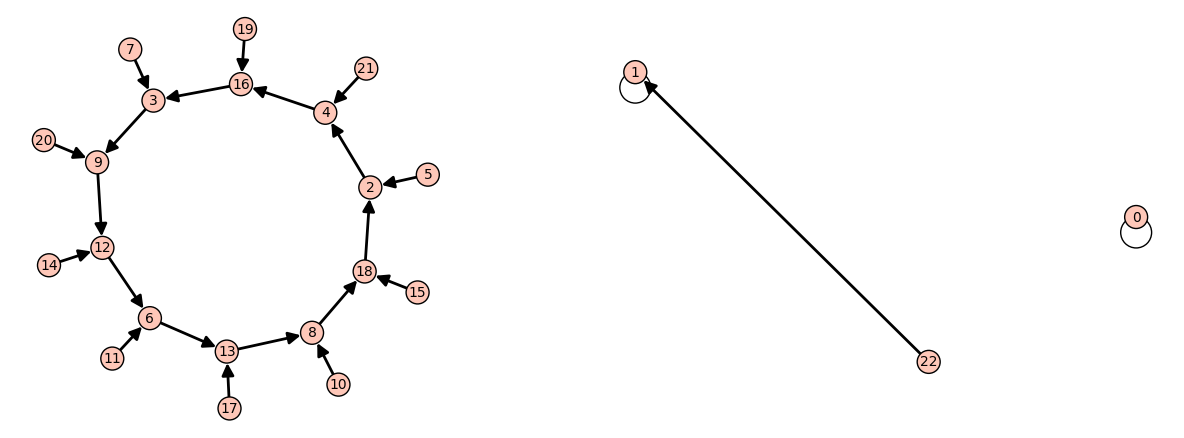

In [32]:
G2 = DiGraph(diccionario(23))
G2.graphplot().show(figsize=[12,12])

In [30]:
print [(p,longitud_ciclos(p)) for p in prime_range(11,50)]

[(11, [4]), (13, [2]), (17, []), (19, [2, 6]), (23, [10]), (29, [3]), (31, [2, 4, 4]), (37, [2, 6]), (41, [4]), (43, [2, 3, 6]), (47, [11])]


Hay que entender que estas son las longitudes posibles de los ciclos, pero lo que querríamos saber es si todas las longitudes posibles se dan, es decir ¿Todo lo que puede ocurrir ocurre realmente?

In [31]:
def ciclosn2(f,m):
    L = []
    A = set([])
    for n in srange(m):
        orb = orbita_c(f,n,m)
        if f(orb[-1],m)==orb[0] and orb[-1] not in A and len(orb)>1:
            L.append(orb)
            A = A | set(orb)
    return L




def comprobador_long_ciclos(N):
    L = []
    for p in prime_range(5,N):
        L1 = ciclosn2(f,p)
        longit_efec = map(len,L1)
        longit_pos = longitud_ciclos(p)
        ##print longit_efec,longit_pos
        if set(longit_efec) !=  set(longit_pos):
            L.append(p)
    return L

%time comprobador_long_ciclos(1000)
        
        
        
    

CPU times: user 12 s, sys: 184 ms, total: 12.1 s
Wall time: 11.9 s


[]

Hasta donde hemos comprobado se cumple que todas las longitudes posibles de los ciclos, para cada primo $p$,  ocurren realmente entre las que realmente existen. Hay muchas más preguntas que podemos hacernos:

1. Algunos ciclos, como el que tenemos de longitud $10$ para el primo $23$ tienen la propiedad de que para todo elemento del ciclo hay otro, y sólo uno,  que cae en él ¿Es ésto un fenómeno general? Es decir, es verdad que existe un entero $i$, dependiente de una aritmética similar a la que determina las longitudes posibles de los ciclos, tal que todo elemento del ciclo es el final de una cadena de $i$ elementos? Si pudiéramos demostrar algo así podríamos, probablemente,  determinar el número de ciclos.

2. ¿Qué podemos decir cuando el entero $m$ es compuesto? Podríamos empezar estudiando el caso de enteros que son el producto de dos primos, y luego, el caso en que todos los primos en la factorización tienen exponente $1$.  